In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [19]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/avocado.csv')

In [14]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [22]:
df.drop(columns = df.columns[0],axis=1,inplace = True)

In [23]:
df.sample(5)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
7225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
400,24-05-2015,1.15,3574050.61,758183.5,1764210.85,263068.72,788587.54,641756.72,134308.54,12522.28,conventional,2015.0,GreatLakes
2072,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
df.isnull().sum()

Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

In [28]:
df = df.dropna()

In [29]:
df.shape

(1517, 13)

In [30]:
df.sample(5)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1380,10-07-2016,1.32,549815.44,17289.06,359933.80,14982.90,157609.68,153175.43,49.25,4385.00,conventional,2016.0,Boston
799,29-03-2015,0.57,1231267.27,998057.91,157108.31,8638.85,67462.20,43759.93,23702.27,0.00,conventional,2015.0,PhoenixTucson
705,01-11-2015,1.07,350260.55,3271.40,281498.53,209.48,65281.14,65081.14,200.00,0.00,conventional,2015.0,NorthernNewEngland
116,05-07-2015,1.16,896298.77,66504.67,567640.70,56044.51,206108.89,200097.99,5890.57,120.33,conventional,2015.0,BaltimoreWashington
920,19-04-2015,1.08,144665.27,68391.59,44913.65,146.75,31213.28,30623.78,589.50,0.00,conventional,2015.0,Roanoke


The data is not recorded properly. There were 14951 rows with no values in them.

Therefore, proceeding with the remaining variables.

In [31]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year            float64
region           object
dtype: object

In [35]:
df['Date'] = pd.to_datetime(df['Date'])

<ipython-input-35-b9c6864122be>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


In [39]:
df.Date[2].week

50

In [47]:
del(df['week'])
df['week'] = [item.week for item in df['Date']]

<ipython-input-47-4439db3791b9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['week'] = [item.week for item in df['Date']]


In [48]:
df['week'].value_counts()

24    72
19    62
1     60
50    49
46    48
33    47
37    45
10    40
16    39
49    38
12    38
11    37
41    36
8     35
20    34
22    34
7     34
31    33
32    33
13    32
15    32
17    32
28    32
21    32
6     31
26    29
47    28
4     28
25    28
51    28
2     27
3     26
39    24
42    24
43    24
34    24
29    23
30    23
38    23
48    22
52    21
14    21
35    20
44    19
45    14
9     11
40     9
23     5
18     4
36     4
27     3
Name: week, dtype: int64

<AxesSubplot:xlabel='week', ylabel='AveragePrice'>

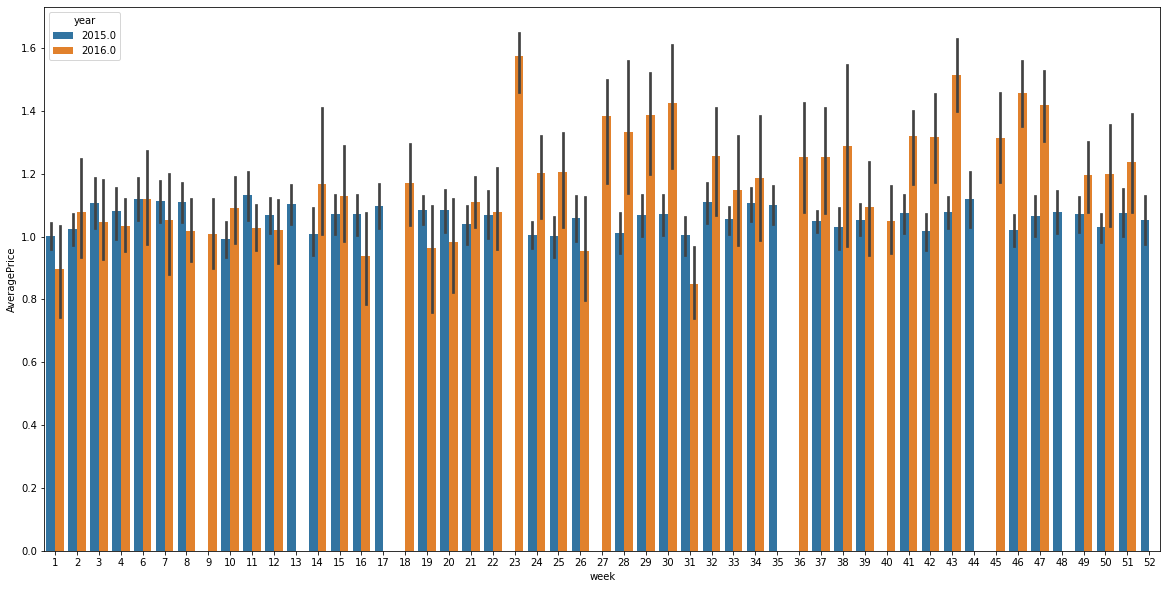

In [50]:
plt.figure(figsize=(20,10))
sns.barplot(x = df['week'],y = df['AveragePrice'],hue = df['year'])

<AxesSubplot:xlabel='week', ylabel='AveragePrice'>

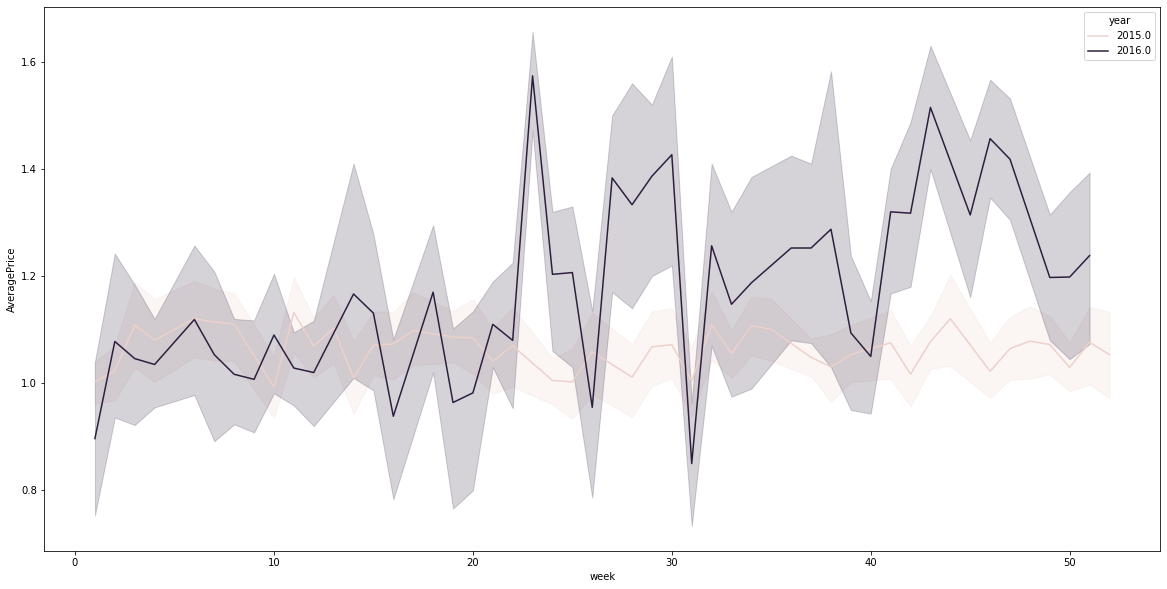

In [51]:
plt.figure(figsize=(20,10))
sns.lineplot(x = df['week'],y = df['AveragePrice'],hue = df['year'])

Looking at the above graphs, we cant find any normal trends or seasonal trends in the purchase of avacados

Therefore, we can drop the week and year columns

In [53]:
df.drop(columns = ['year','week'],inplace=True)

In [54]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1516
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1517 non-null   datetime64[ns]
 1   AveragePrice  1517 non-null   float64       
 2   Total Volume  1517 non-null   float64       
 3   4046          1517 non-null   float64       
 4   4225          1517 non-null   float64       
 5   4770          1517 non-null   float64       
 6   Total Bags    1517 non-null   float64       
 7   Small Bags    1517 non-null   float64       
 8   Large Bags    1517 non-null   float64       
 9   XLarge Bags   1517 non-null   float64       
 10  type          1517 non-null   object        
 11  region        1517 non-null   object        
dtypes: datetime64[ns](1), float64(9), object(2)
memory usage: 194.1+ KB


In [56]:
df.drop(columns = ['Date'],inplace=True)

In [57]:
for i in df.columns:
    print(i,df[i].unique())

AveragePrice [1.33 1.35 0.93 1.08 1.28 1.26 0.99 0.98 1.02 1.07 1.12 1.31 1.11 1.34
 1.45 1.05 1.37 1.27 1.32 1.23 1.19 1.43 1.2  1.22 1.13 1.16 1.06 1.17
 1.24 0.96 1.   1.09 0.95 0.97 1.15 1.01 1.14 1.1  1.04 1.18 1.29 1.25
 1.03 1.39 1.4  1.36 1.3  0.88 1.21 0.9  0.94 0.75 0.77 0.81 0.8  0.72
 0.79 0.67 0.82 0.68 0.76 0.91 1.38 0.92 0.78 0.74 0.62 0.83 0.87 0.73
 0.7  0.89 0.85 1.44 1.42 1.41 0.49 0.53 0.66 0.56 0.6  0.71 0.65 0.58
 0.54 0.52 0.51 0.57 0.63 0.64 0.61 0.84 0.86 0.69 1.52 1.53 1.49 1.48
 1.56 1.62 1.63 1.46 1.51 1.61 1.47 1.66 1.57 1.6  1.5  1.68 1.54 1.64
 1.58]
Total Volume [ 64236.62  54876.98 118220.22 ... 178410.82 189131.52 182978.3 ]
4046 [ 1036.74   674.28   794.7  ... 46364.75 54110.79 43116.41]
4225 [ 54454.85  44638.81 109149.67 ...  52893.38  53593.58  54193.42]
4770 [   48.16    58.33   130.5  ... 16736.92 17495.42 16563.91]
Total Bags [ 8696.87  9505.56  8145.35 ... 62415.77 63931.73 69104.56]
Small Bags [ 8603.62  9408.07  8042.21 ... 53332.61 55653.47 

only conventional type of avacados data is available.

We can drop the type column

In [60]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,Albany


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1516
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  1517 non-null   float64
 1   Total Volume  1517 non-null   float64
 2   4046          1517 non-null   float64
 3   4225          1517 non-null   float64
 4   4770          1517 non-null   float64
 5   Total Bags    1517 non-null   float64
 6   Small Bags    1517 non-null   float64
 7   Large Bags    1517 non-null   float64
 8   XLarge Bags   1517 non-null   float64
 9   region        1517 non-null   object 
dtypes: float64(9), object(1)
memory usage: 170.4+ KB


Region is a nominal data, hence, lets encode the variable.

In [64]:
df1 = pd.get_dummies(df['region'])

In [67]:
df = pd.concat([df,df1],axis=1)

In [68]:
df.shape

(1517, 61)

In [69]:
df.drop(columns = ['region'],inplace=True)

In [70]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,Albany,...,SouthCarolina,SouthCentral,Southeast,Spokane,StLouis,Syracuse,Tampa,TotalUS,West,WestTexNewMexico
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,1,...,0,0,0,0,0,0,0,0,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,1,...,0,0,0,0,0,0,0,0,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,1,...,0,0,0,0,0,0,0,0,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,1,...,0,0,0,0,0,0,0,0,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,1,...,0,0,0,0,0,0,0,0,0,0


The variables has huge difference corresponding with others, and this might lead to bias in model prediction.There fore we need to address this concern by scaling the variables.

C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

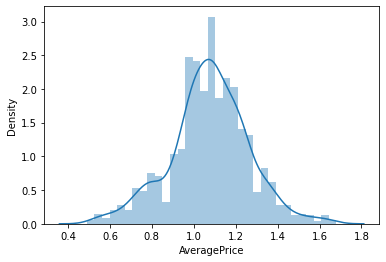

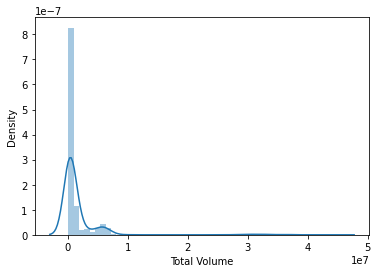

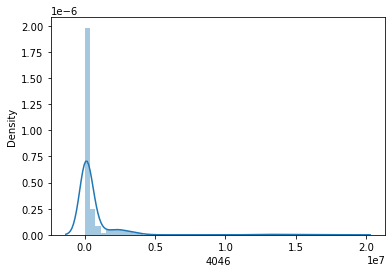

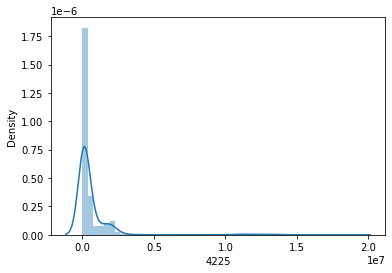

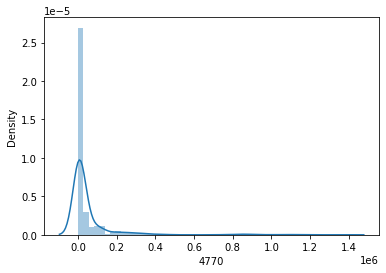

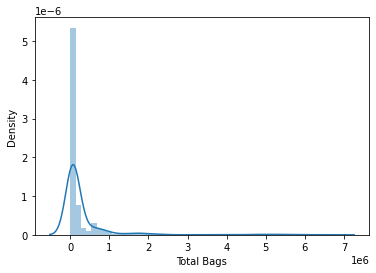

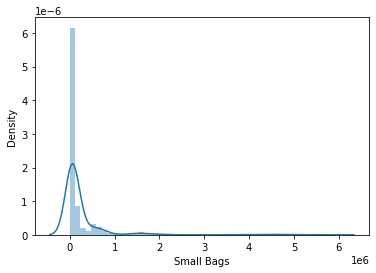

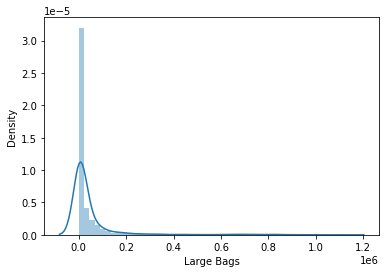

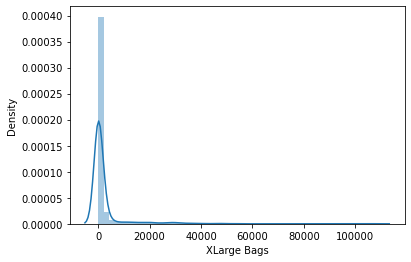

In [72]:
for i in df.columns:
    if i == 'Albany':
        break
    else:
        plt.subplots()
        sns.distplot(df[i])

The dependent variable, avg price looks normally distributed.

The independent variables look a little right skew. Outliers may be the cause for that.

C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AKHIL\anaconda3\lib\si

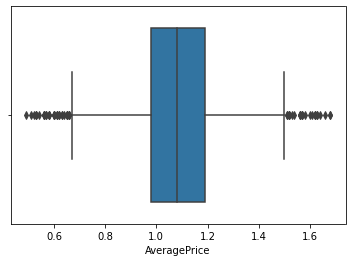

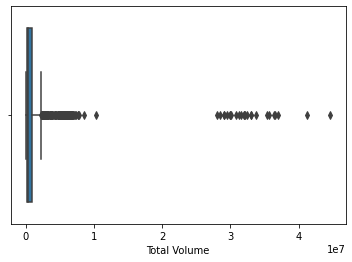

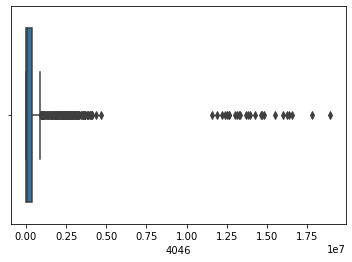

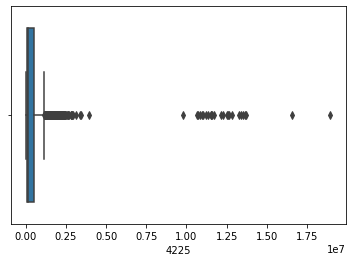

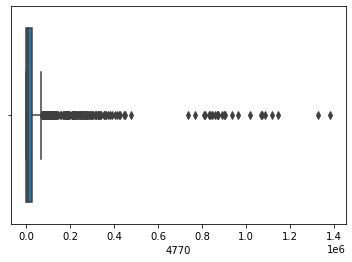

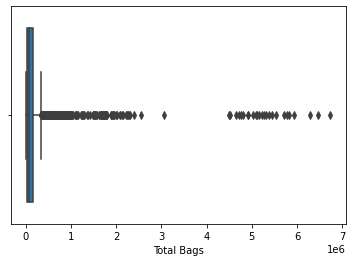

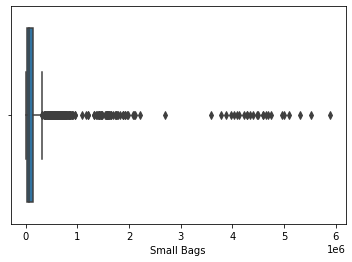

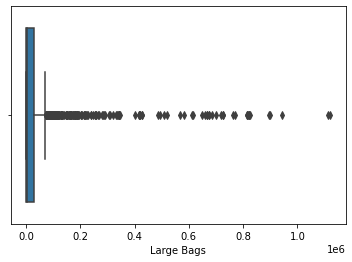

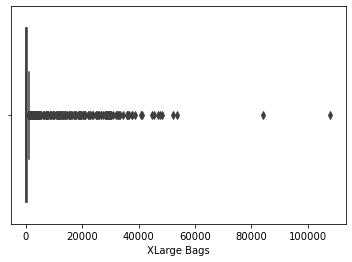

In [73]:
for i in df.columns:
    if i == 'Albany':
        break
    else:
        plt.subplots()
        sns.boxplot(df[i])

There are many outliers in the data. Before going to remove the data, lets check the skewness after log transformation

In [74]:
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'Albany', 'Atlanta',
       'BaltimoreWashington', 'Boise', 'Boston', 'BuffaloRochester',
       'California', 'Charlotte', 'Chicago', 'Columbus', 'DallasFtWorth',
       'Denver', 'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale', 'Midsouth',
       'Nashville', 'NewYork', 'Northeast', 'NorthernNewEngland', 'Orlando',
       'Philadelphia', 'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'SanDiego',
       'SanFrancisco', 'Seattle', 'SouthCarolina', 'SouthCentral', 'Southeast',
       'Spokane', 'StLouis', 'Syracuse', 'Tampa', 'TotalUS', 'West',
       'WestTexNewMexico'],
      dtype='object')

In [81]:
copy = df.loc[:,'AveragePrice':'XLarge Bags']

In [82]:
copy.skew()

AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
dtype: float64

In [83]:
for i in copy.columns:
    print(i, np.log(copy[i]).skew())

AveragePrice -0.8290441689007514
Total Volume 0.6674608508123422
4046 -0.16052332940310188
4225 0.18435882332616058
4770 nan
Total Bags 0.6954447204424892
Small Bags 0.7137858551009284
Large Bags nan
XLarge Bags nan


C:\Users\AKHIL\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


few variables skewness is nan, lets check with sqrt transformation

In [84]:
for i in copy.columns:
    print(i, np.sqrt(copy[i]).skew())

AveragePrice -0.460427865959457
Total Volume 3.1293597970163654
4046 2.883385005525863
4225 2.891611018536774
4770 2.531302541514441
Total Bags 2.9516765081986884
Small Bags 2.9561669262154218
Large Bags 2.5171646745695155
XLarge Bags 2.916660584519801


The skewness is reduced but not still acceptable.

In [85]:
for i in copy.columns:
    print(i, np.cbrt(copy[i]).skew())

AveragePrice -0.5810192246452505
Total Volume 2.1240064184264873
4046 1.767021149242718
4225 1.7759445530437743
4770 1.5269434039083332
Total Bags 2.1490875271091823
Small Bags 2.143412802085124
Large Bags 1.4317035242600684
XLarge Bags 2.000670452880216


even with cube root, its not still acceptable

In [88]:
copy1 = pd.DataFrame({})

from scipy.stats import boxcox
for i in copy.columns:
    copy1[i] , var = boxcox(copy[i])
    print(i,var)

AveragePrice 1.2064094081356018
Total Volume -0.1976127573392493
4046 0.02917180195280584
4225 -0.041947958213514144


ValueError: Data must be positive.

Looks like there are negative values in the variable 4770.

C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='4770', ylabel='Density'>

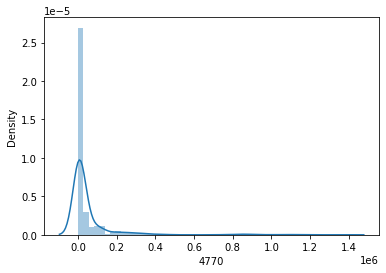

In [90]:
sns.distplot(df['4770'])

In [91]:
copy.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000


There are no negative values, but there are values with '0'.

Therefore, log, boxcox transformation isnt working for this.

lets check with power transformation

In [93]:
from sklearn.preprocessing import power_transform

In [107]:
copy1 = power_transform(copy,method = 'yeo-johnson')

C:\Users\AKHIL\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [108]:
copy1 = pd.DataFrame(copy1,columns = copy.columns)

In [109]:
copy1.skew()

AveragePrice    0.021101
Total Volume    0.000000
4046           -0.012059
4225            0.008450
4770           -0.032945
Total Bags      0.005205
Small Bags      0.027632
Large Bags     -0.074795
XLarge Bags     0.417289
dtype: float64

Box-Cox requires input data to be strictly positive, while Yeo-Johnson
supports both positive or negative data.

By default, zero-mean, unit-variance normalization is applied to the
transformed data.

C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Total Volume', ylabel='Density'>

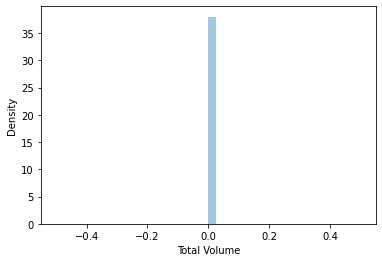

In [110]:
sns.distplot(copy1['Total Volume'])

we can see that the total volume has been transformed in a way that skew is totally zero, and all the values are at 0.

Therefore, lets use boxcox for total volume and yeo-jhonson method for other columns

In [111]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,Albany,...,SouthCarolina,SouthCentral,Southeast,Spokane,StLouis,Syracuse,Tampa,TotalUS,West,WestTexNewMexico
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,1,...,0,0,0,0,0,0,0,0,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,1,...,0,0,0,0,0,0,0,0,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,1,...,0,0,0,0,0,0,0,0,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,1,...,0,0,0,0,0,0,0,0,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,1,...,0,0,0,0,0,0,0,0,0,0


In [112]:
df.shape

(1517, 60)

In [113]:
Y = df['AveragePrice']
X = df.drop(columns= ['AveragePrice'])

In [115]:
from scipy.stats import boxcox
X['Total Volume'], var = boxcox(X['Total Volume'])

In [116]:
X.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,Albany,Atlanta,...,SouthCarolina,SouthCentral,Southeast,Spokane,StLouis,Syracuse,Tampa,TotalUS,West,WestTexNewMexico
0,4.492719,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,4.474775,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,4.557184,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4.515448,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,4.466325,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [121]:
copy1 = power_transform(X.drop(columns = ['Total Volume']),method = 'yeo-johnson')

In [122]:
copy1 = pd.DataFrame(copy1,columns = X.loc[:,'4046':'WestTexNewMexico'].columns)

In [123]:
copy1.head()

,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,Albany,Atlanta,BaltimoreWashington,...,SouthCarolina,SouthCentral,Southeast,Spokane,StLouis,Syracuse,Tampa,TotalUS,West,WestTexNewMexico
0,-1.757736,-0.545363,-1.675878,-2.030217,-1.847586,-1.072172,-0.885019,4.652074,-0.192121,-0.211579,...,-0.126787,-0.162441,-0.077254,-0.182699,-0.103245,-0.112621,-0.151415,-0.129445,-0.15591,-0.134614
1,-1.919557,-0.667814,-1.619934,-1.931468,-1.748426,-1.062461,-0.885019,4.652074,-0.192121,-0.211579,...,-0.126787,-0.162441,-0.077254,-0.182699,-0.103245,-0.112621,-0.151415,-0.129445,-0.15591,-0.134614
2,-1.857996,-0.124940,-1.375858,-2.103934,-1.923541,-1.050081,-0.885019,4.652074,-0.192121,-0.211579,...,-0.126787,-0.162441,-0.077254,-0.182699,-0.103245,-0.112621,-0.151415,-0.129445,-0.15591,-0.134614
3,-1.724410,-0.375219,-1.555093,-2.497084,-2.330946,-0.991861,-0.885019,4.652074,-0.192121,-0.211579,...,-0.126787,-0.162441,-0.077254,-0.182699,-0.103245,-0.112621,-0.151415,-0.129445,-0.15591,-0.134614
4,-1.794175,-0.679011,-1.542167,-2.422996,-2.267260,-0.900922,-0.885019,4.652074,-0.192121,-0.211579,...,-0.126787,-0.162441,-0.077254,-0.182699,-0.103245,-0.112621,-0.151415,-0.129445,-0.15591,-0.134614


In [124]:
X1 = pd.concat([X['Total Volume'],copy1],axis=1)
    

In [125]:
X1.shape

(1517, 59)

In [126]:
Y.shape

(1517,)

Our data has been divided into target and explainatory variables and ready for modelling.

In [129]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest =  train_test_split(X1,Y,test_size = 0.3,random_state = 33)

In [130]:
from sklearn.linear_model import LinearRegression

lr =  LinearRegression()
lr.fit(xtrain,ytrain)
predlr = lr.predict(xtest)

In [131]:
from sklearn.metrics import r2_score, mean_absolute_error

In [132]:
print(r2_score(ytest,predlr))
print(mean_absolute_error(ytest,predlr))

0.7476444464893912
0.06748379498817564


The r2_score is pretty good and error is very low.

Lets try increasing the accuracy.

In [138]:
from sklearn.ensemble import RandomForestRegressor

rfr =  RandomForestRegressor()
rfr.fit(xtrain,ytrain)
predrf = rfr.predict(xtest)

print(r2_score(ytest,predrf))
print(mean_absolute_error(ytest,predrf))

0.7981214735711055
0.06164254385964911


The r2 score is increased and error is decreased.

Lets validate the score using cross val score

In [140]:
from sklearn.model_selection import cross_val_score

cvs = cross_val_score(lr,xtrain,ytrain,scoring = 'r2',cv=5)
cvs.mean()

0.7322390653767936

In [141]:
cvs1 = cross_val_score(rfr,xtrain,ytrain,scoring = 'r2',cv=5)
cvs1.mean()

0.7656200487003089

The difference for random forest regressor is more than linear regression

In [144]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1).fit(xtrain,ytrain)
predr = ridge.predict(xtest)

print(r2_score(ytest,predr))
print(mean_absolute_error(ytest,predr))

0.7395297748955811
0.07189306103025038


In [145]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1).fit(xtrain,ytrain)
predl = lasso.predict(xtest)

print(r2_score(ytest,predl))
print(mean_absolute_error(ytest,predl))

-0.012335020533465135
0.15088064470790546


Now when alpha = 1 the lasso doesnt work as intended. lets try tuning the parameters and alpha

For ridge,

In [146]:
from sklearn.model_selection import GridSearchCV

alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='r2')
grid_result = grid.fit(xtrain, ytrain)
print('Best score: ', grid_result.best_score_)
print('Best params: ', grid_result.best_params_)

Best score:  0.7322798949788473
Best params:  {'alpha': 0.001}


For lasso, lets see the best params

In [147]:
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='r2')
grid_result = grid.fit(xtrain, ytrain)
print('Best score: ', grid_result.best_score_)
print('Best params: ', grid_result.best_params_)

Best score:  0.6557058645198353
Best params:  {'alpha': 0.001}


As, we can see, after regularization and finding best params, the r2 score is not increased as we intended.

Lets try tuning the linear regression model which has less difference in scores after cross validating

In [154]:
parameters = {'fit_intercept':[True,False], 'normalize':[True,False]}

grid = GridSearchCV(estimator=lr, param_grid = parameters, scoring='r2')
grid_result = grid.fit(xtrain, ytrain)

print(grid.score(xtest,ytest))
grid.best_params_

0.7476499947283224


{'fit_intercept': True, 'normalize': True}

Since, we already used power transformation to address the skewness and make the data look normally distributed. we opt False in normalize

In [155]:
from sklearn.linear_model import LinearRegression

lr =  LinearRegression(fit_intercept = True, normalize= False)
lr.fit(xtrain,ytrain)
predlr = lr.predict(xtest)

print(r2_score(ytest,predlr))
print(mean_absolute_error(ytest,predlr))

0.7476444464893912
0.06748379498817564


The accuracy of our model is 74%

## Conclusion

The dataset contains data of only conevntional type of avacodos from 2015 and 2016 only.

We have cleaned the data, removed skewness by transformation without ignoring outliers.

We have used linear regression model to predict the average price of avacodo.

We have tried regularization, but the increase in scores is not satisfactory. Hence, we selected the linear regression model without regularization.

The final accuracy we have acheived is 74%

In [156]:
import pickle
filename = 'avacado.pkl'

pickle.dump(lr,open(filename,'wb'))